In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/sythentic_tb.csv')

In [3]:
data.head()

,sex,age_above_16,previous_tb,contact_tb_patient,family_tb,smoking,substance_abuse,hiv_status,diabetes_status,anaemia_status,malnutrition,other_infection,cough_two_weeks,fever,hemoptysis,night_sweats,weight_loss,malaise,difficult_breathing,swell_lymph_node,reduced_air_entry,Increased_respiratory_rate,chest_pain,status
0,1,1,1,0,0,1,1,1,0,1,0,1,1,1,0,1,1,1,0,0,0,0,1,1
1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0
4,1,1,1,0,1,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,1,1


Exploratory data Analysisi on the data


In [4]:
data.columns

Index(['sex', 'age_above_16', 'previous_tb', 'contact_tb_patient', 'family_tb',
       'smoking', 'substance_abuse', 'hiv_status', 'diabetes_status',
       'anaemia_status', 'malnutrition', 'other_infection', 'cough_two_weeks',
       'fever', 'hemoptysis', 'night_sweats', 'weight_loss', 'malaise',
       'difficult_breathing', 'swell_lymph_node', 'reduced_air_entry',
       'Increased_respiratory_rate', 'chest_pain', 'status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   sex                         10000 non-null  int64
 1   age_above_16                10000 non-null  int64
 2   previous_tb                 10000 non-null  int64
 3   contact_tb_patient          10000 non-null  int64
 4   family_tb                   10000 non-null  int64
 5   smoking                     10000 non-null  int64
 6   substance_abuse             10000 non-null  int64
 7   hiv_status                  10000 non-null  int64
 8   diabetes_status             10000 non-null  int64
 9   anaemia_status              10000 non-null  int64
 10  malnutrition                10000 non-null  int64
 11  other_infection             10000 non-null  int64
 12  cough_two_weeks             10000 non-null  int64
 13  fever                       10000 non-null  int64
 14  hemopty

In [6]:
data.describe()

,sex,age_above_16,previous_tb,contact_tb_patient,family_tb,smoking,substance_abuse,hiv_status,diabetes_status,anaemia_status,malnutrition,other_infection,cough_two_weeks,fever,hemoptysis,night_sweats,weight_loss,malaise,difficult_breathing,swell_lymph_node,reduced_air_entry,Increased_respiratory_rate,chest_pain,status
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.461400,0.504700,0.619900,0.174900,0.545900,0.436300,0.34250,0.346400,0.446100,0.589700,0.386200,0.546200,0.648000,0.659700,0.176800,0.618500,0.631100,0.501100,0.319400,0.151600,0.301600,0.325000,0.507300,0.501900
std,0.498533,0.500003,0.485435,0.379901,0.497914,0.495951,0.47457,0.475846,0.497111,0.491913,0.486902,0.497886,0.477618,0.473834,0.381518,0.485779,0.482531,0.500024,0.466267,0.358651,0.458975,0.468398,0.499972,0.500021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


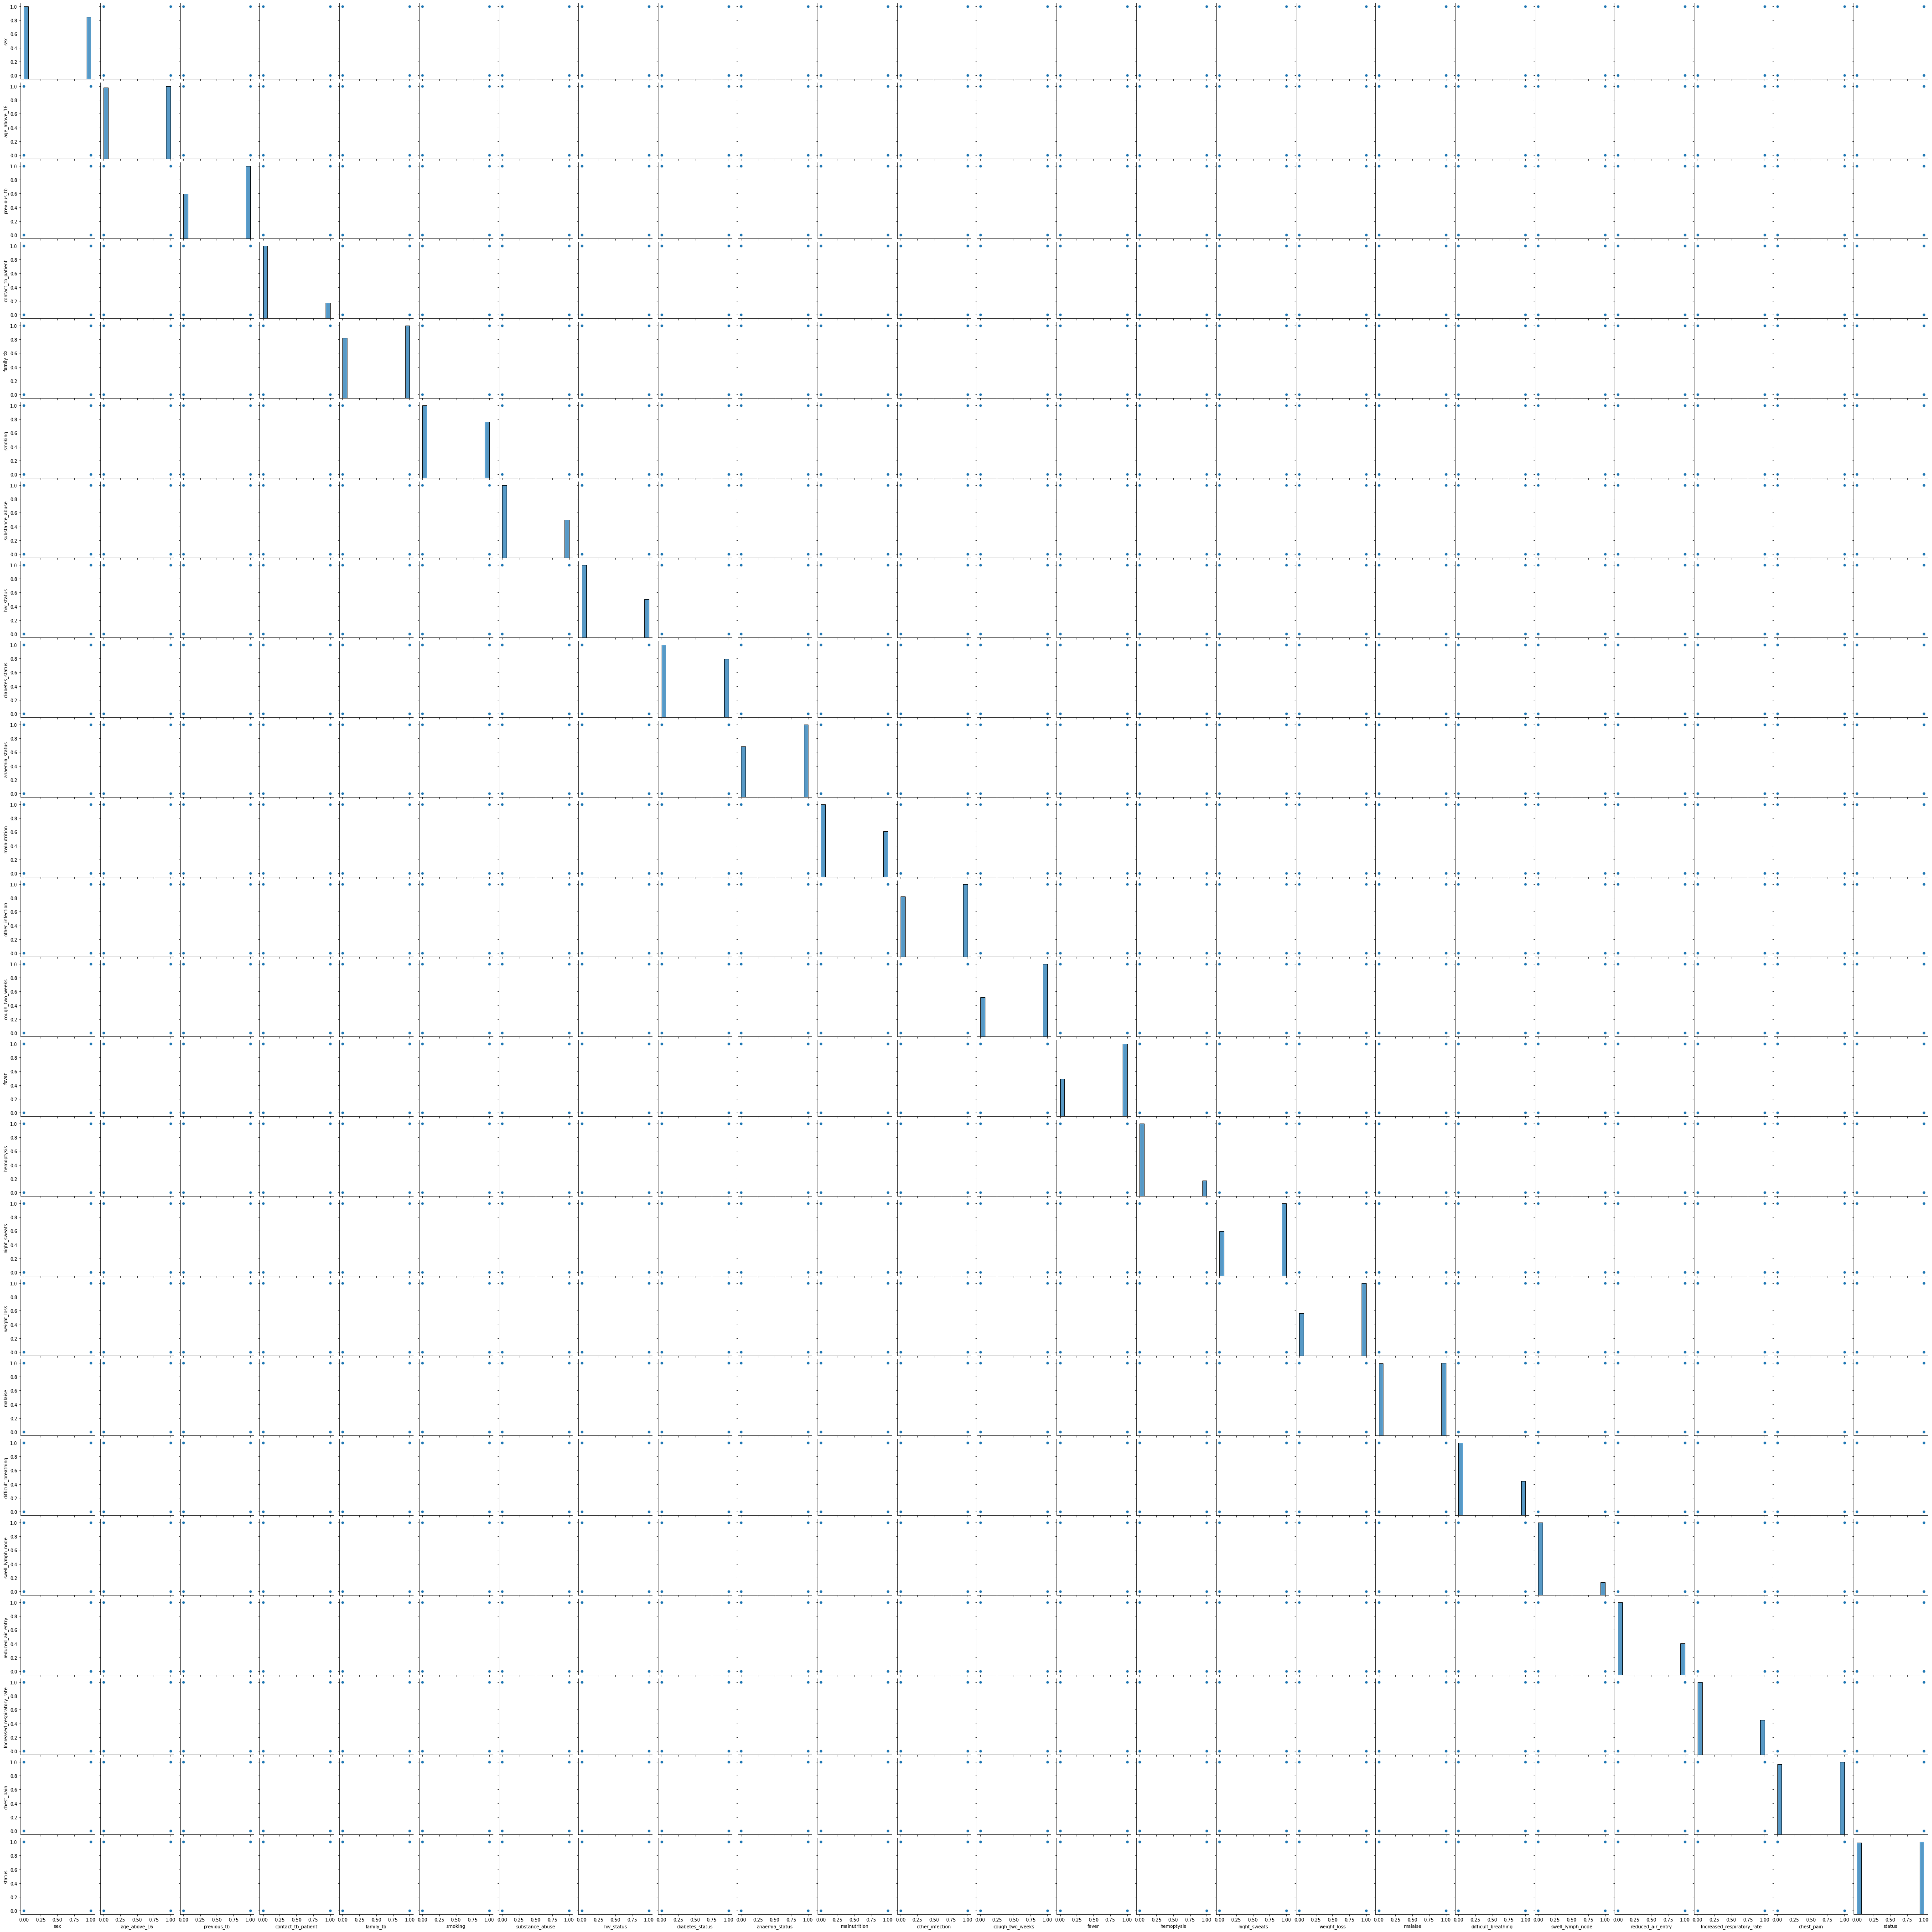

In [13]:
import seaborn as sns
sns.pairplot(data)

Divide the data  into label and Train

In [16]:
label = data['status']
train = data.drop(['status'], axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,label, test_size=0.2, random_state=0)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train,label, test_size=0.2, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20,random_state=0)
clf.fit(x_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Lets see the perfomnce of the of the model

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
rf = clf
print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, rf.predict(x_train)))
print('Precision:', precision_score(y_train, rf.predict(x_train)))
print('Recall:', recall_score(y_train, rf.predict(x_train)))
print(".......................")
print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, rf.predict(x_test)))
print('Precision:', precision_score(y_test, rf.predict(x_test)))
print('Recall:', recall_score(y_test, rf.predict(x_test)))

Training set metrics:
Accuracy: 0.999875
Precision: 1.0
Recall: 0.9997525365008662
.......................
Test set metrics:
Accuracy: 0.995
Precision: 0.9959016393442623
Recall: 0.9938650306748467


In [ ]:
#Save the model as joblib

In [ ]:
import joblib
joblib.dump(clf, "./tb_model.joblib")

['./tb_model.joblib']

In [ ]:
#Import the model back for testing

In [ ]:
rf = joblib.load("./tb_model.joblib")

In [37]:
patient_a = [[1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,0,0,0]]

In [41]:
result = rf.predict_proba(patient_a); result    # The function to predict the status of the patient

array([[0.65, 0.35]])

In [42]:
result =  np.ndarray.tolist(result);result      #Convert the ndArray to a list

[[0.65, 0.35]]

In [45]:
import pydash
from pydash import flatten

In [46]:
result = pydash.flatten_deep(result);result     #Convert the mult dimensional list to one dimension

[0.65, 0.35]

In [47]:
result[1]                                       # Return only the index 1 result

0.35

In [30]:
pip install plotly_express

# This is the plot showing the feature importance of the variables in model

In [ ]:
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':train.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})

import plotly_express as px
px.bar(feat_imp, x='cols', y='imps')

